<aside>
😻 김영호 멋잇땀!!

</aside>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('Data/외래관광객_연령별_여행참여(전처리).csv')

# df[df.columns.difference(['연령', '연도'], sort=False)]
df

,연령,연도,쇼핑,식도락관광,자연경관감상,고궁/역사유적지방문,업무수행,유흥/오락,"박물관,전시관방문",테마파크,...,"온천,스파","연수,교육,연구",뷰티관광,레포츠활동,카지노,스포츠활동,산업시설시찰,의료관광,직업적스포츠활동,기타
0,15-20세,2015,80.30,51.20,27.92,26.74,2.64,18.04,10.77,12.34,...,3.41,8.91,2.83,3.05,3.15,3.05,0.75,0.91,0.86,1.24
1,21-30세,2015,78.84,52.89,30.16,24.93,5.97,16.52,10.80,9.96,...,4.98,5.93,3.89,2.82,2.21,2.68,1.17,1.11,0.37,1.60
2,31-40세,2015,71.84,48.93,30.19,25.28,15.34,10.79,10.97,8.13,...,4.56,3.27,3.69,2.19,2.34,1.85,1.89,1.11,0.49,1.98
3,41-50세,2015,62.45,39.30,29.02,25.05,23.84,5.96,10.13,6.58,...,5.38,3.70,2.54,1.79,2.05,1.90,2.72,1.15,0.86,1.38
4,51-60세,2015,53.25,33.48,29.24,31.20,23.52,4.89,9.16,4.05,...,4.71,3.11,2.21,2.15,1.75,1.15,2.91,1.47,0.60,3.79
5,61세이상,2015,60.23,37.95,36.24,38.66,12.96,4.42,9.30,3.95,...,3.87,2.39,2.52,2.12,1.73,2.63,2.12,1.13,0.40,5.38
6,모름/무응답,2015,68.40,54.93,19.09,28.95,10.97,12.67,3.43,3.84,...,3.64,3.25,9.07,0.00,4.47,1.19,1.19,8.18,0.00,6.70
7,15-20세,2016,81.09,52.82,25.07,24.17,1.04,23.05,8.66,17.71,...,4.96,13.43,2.53,2.32,5.11,2.70,0.88,1.15,0.55,0.41
8,21-30세,2016,82.33,57.24,29.73,22.69,4.56,20.35,10.87,11.50,...,5.64,5.51,3.73,2.21,2.76,2.22,0.64,0.70,0.22,1.01
9,31-40세,2016,78.21,50.72,27.51,25.95,12.47,13.15,10.76,10.93,...,4.46,2.28,3.04,1.84,2.44,1.89,1.62,1.59,0.22,1.48


<BarContainer object of 7 artists>

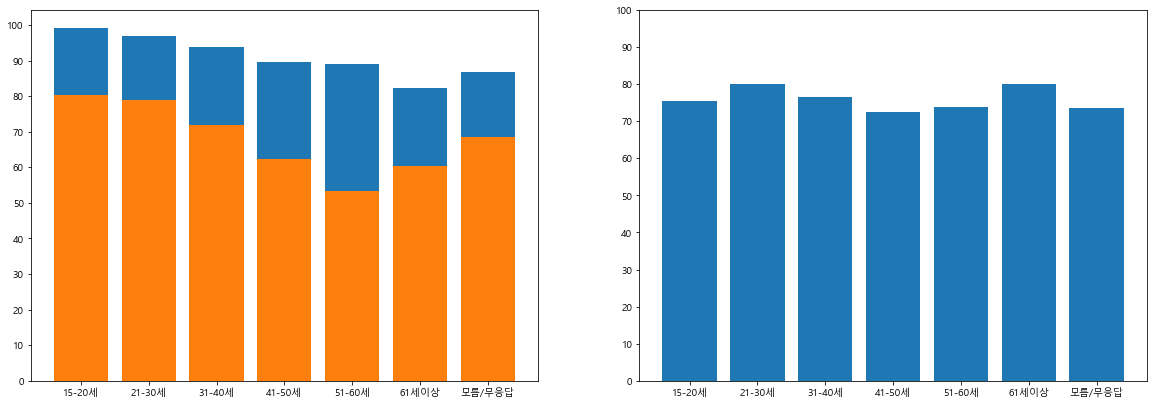

In [2]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.bar(df['연령'], df['쇼핑'])
plt.yticks(range(0, 110, 10))
plt.subplot(2, 2, 2)
plt.bar(df['연령'], df['식도락관광'])
plt.yticks(range(0, 110, 10))
plt.subplot(2, 2, 1)
plt.bar(df[df['연도'] == 2015]['연령'], df[df['연도'] == 2015]['쇼핑'])

In [3]:
df = df.fillna(0)

In [4]:
col = df.columns.difference(['연령', '연도'], sort=False)
list(col)

pca = PCA(n_components=2)
pca_transform = pca.fit_transform(df[col])

df['pca_x'] = pca_transform[:,0]
df['pca_y'] = pca_transform[:,1]

df

,연령,연도,쇼핑,식도락관광,자연경관감상,고궁/역사유적지방문,업무수행,유흥/오락,"박물관,전시관방문",테마파크,...,뷰티관광,레포츠활동,카지노,스포츠활동,산업시설시찰,의료관광,직업적스포츠활동,기타,pca_x,pca_y
0,15-20세,2015,80.30,51.20,27.92,26.74,2.64,18.04,10.77,12.34,...,2.83,3.05,3.15,3.05,0.75,0.91,0.86,1.24,2.667950,18.483525
1,21-30세,2015,78.84,52.89,30.16,24.93,5.97,16.52,10.80,9.96,...,3.89,2.82,2.21,2.68,1.17,1.11,0.37,1.60,3.063371,14.376411
2,31-40세,2015,71.84,48.93,30.19,25.28,15.34,10.79,10.97,8.13,...,3.69,2.19,2.34,1.85,1.89,1.11,0.49,1.98,10.315890,4.347244
3,41-50세,2015,62.45,39.30,29.02,25.05,23.84,5.96,10.13,6.58,...,2.54,1.79,2.05,1.90,2.72,1.15,0.86,1.38,22.219279,-4.832454
4,51-60세,2015,53.25,33.48,29.24,31.20,23.52,4.89,9.16,4.05,...,2.21,2.15,1.75,1.15,2.91,1.47,0.60,3.79,29.145020,-12.802779
5,61세이상,2015,60.23,37.95,36.24,38.66,12.96,4.42,9.30,3.95,...,2.52,2.12,1.73,2.63,2.12,1.13,0.40,5.38,18.082192,-10.995258
6,모름/무응답,2015,68.40,54.93,19.09,28.95,10.97,12.67,3.43,3.84,...,9.07,0.00,4.47,1.19,1.19,8.18,0.00,6.70,13.661512,10.091315
7,15-20세,2016,81.09,52.82,25.07,24.17,1.04,23.05,8.66,17.71,...,2.53,2.32,5.11,2.70,0.88,1.15,0.55,0.41,2.712887,26.280160
8,21-30세,2016,82.33,57.24,29.73,22.69,4.56,20.35,10.87,11.50,...,3.73,2.21,2.76,2.22,0.64,0.70,0.22,1.01,-1.029782,19.308442
9,31-40세,2016,78.21,50.72,27.51,25.95,12.47,13.15,10.76,10.93,...,3.04,1.84,2.44,1.89,1.62,1.59,0.22,1.48,5.916887,11.082604


C:\Users\nono\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


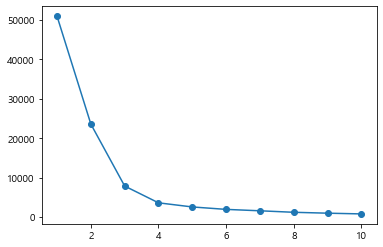

In [5]:
inertias = []

for i in range(1, 11):
    temp = KMeans(n_clusters=i, init='k-means++')
    temp.fit(df[['pca_x', 'pca_y']])
    inertias.append(temp.inertia_)

plt.figure()
plt.plot(range(1, 11), inertias, '-o')

C:\Users\nono\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nono\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


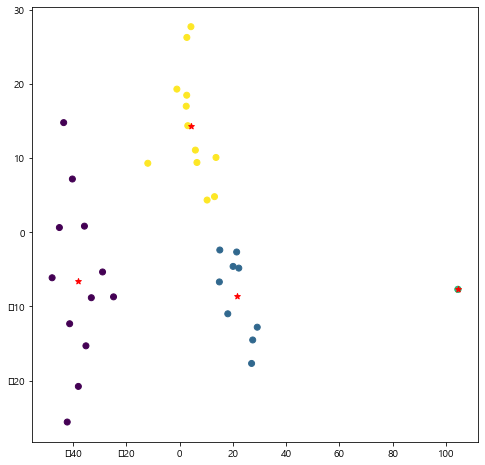

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(df[['pca_x', 'pca_y']])

df['cluster'] = kmeans.labels_
center = kmeans.cluster_centers_

plt.figure(figsize=(8,8))
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='*')

0    12
3    12
1     9
2     2
Name: cluster, dtype: int64


([<matplotlib.patches.Wedge at 0x1b656b7fbb0>,
 [Text(0.5212555002170877, 0.9686551003806432, '0'),
  Text(-1.0955717146903945, -0.0986033365071852, '3'),
  Text(0.4323276998707461, -1.011480479260213, '1'),
  Text(1.0823225886377539, -0.1964123573619333, '2')],
 [Text(0.2843211819365932, 0.5283573274803508, '34.3%'),
  Text(-0.597584571649306, -0.053783638094828286, '34.3%'),
  Text(0.23581510902040692, -0.5517166250510253, '25.7%'),
  Text(0.5903577756205929, -0.10713401310650907, '5.7%')])

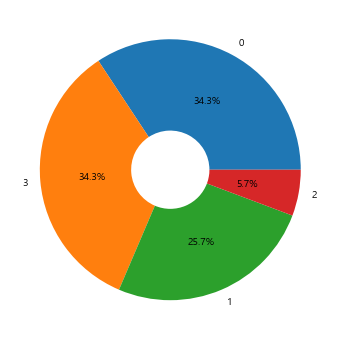

In [7]:
# 각 군집의 개수
c_count = df['cluster'].value_counts()
print(c_count)

plt.figure(figsize=(6,6))
plt.pie(list(c_count), labels=c_count.index, autopct='%.1f%%', wedgeprops={'width': 0.7})

In [8]:
length = len(df['cluster'].unique())

for i in range(length):
    print(i, '번 군집\n')
    temp = df[df['cluster'] == i][col].mean()
    temp_idx = list(temp.index)
    temp_val = list(temp.values)
    temp_zip = list(zip(temp_idx, temp_val))
    for k in temp_zip:
        print(k[0], ': ', int(k[1]))
    print('\n')


0 번 군집

쇼핑 :  91
식도락관광 :  73
자연경관감상 :  56
고궁/역사유적지방문 :  44
업무수행 :  16
유흥/오락 :  17
박물관,전시관방문 :  21
테마파크 :  9
휴양,휴식 :  6
미팅,회의,학술대회,박람회참가 :  0
공연,민속행사,축제참가및관람 :  6
시티투어버스이용 :  3
전통문화체험 :  20
온천,스파 :  0
연수,교육,연구 :  5
뷰티관광 :  3
레포츠활동 :  1
카지노 :  0
스포츠활동 :  1
산업시설시찰 :  1
의료관광 :  1
직업적스포츠활동 :  0
기타 :  1


1 번 군집

쇼핑 :  58
식도락관광 :  42
자연경관감상 :  29
고궁/역사유적지방문 :  28
업무수행 :  22
유흥/오락 :  5
박물관,전시관방문 :  9
테마파크 :  4
휴양,휴식 :  10
미팅,회의,학술대회,박람회참가 :  11
공연,민속행사,축제참가및관람 :  7
시티투어버스이용 :  5
전통문화체험 :  4
온천,스파 :  4
연수,교육,연구 :  3
뷰티관광 :  2
레포츠활동 :  1
카지노 :  1
스포츠활동 :  1
산업시설시찰 :  2
의료관광 :  1
직업적스포츠활동 :  0
기타 :  2


2 번 군집

쇼핑 :  0
식도락관광 :  0
자연경관감상 :  0
고궁/역사유적지방문 :  0
업무수행 :  0
유흥/오락 :  0
박물관,전시관방문 :  0
테마파크 :  0
휴양,휴식 :  0
미팅,회의,학술대회,박람회참가 :  0
공연,민속행사,축제참가및관람 :  0
시티투어버스이용 :  0
전통문화체험 :  0
온천,스파 :  0
연수,교육,연구 :  0
뷰티관광 :  0
레포츠활동 :  0
카지노 :  0
스포츠활동 :  0
산업시설시찰 :  0
의료관광 :  0
직업적스포츠활동 :  0
기타 :  0


3 번 군집

쇼핑 :  77
식도락관광 :  55
자연경관감상 :  28
고궁/역사유적지방문 :  22
업무수행 :  9
유흥/오락 :  14
박물관,전시관방문 :  8
테마파크 :  10

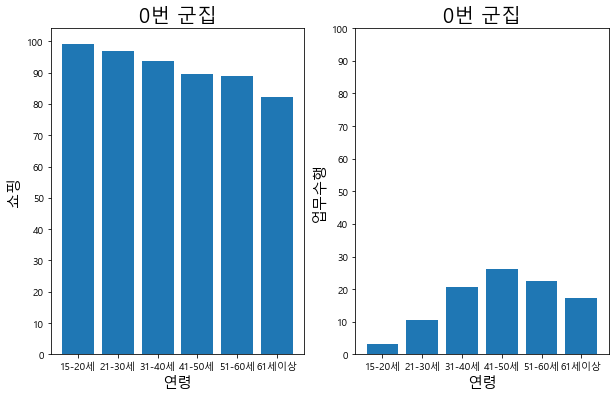

In [9]:

plt.figure(figsize=(10,6))
fig1 = plt.subplot(1,2,1)
plt.bar(df[df['cluster'] == 0]['연령'], df[df['cluster'] == 0]['쇼핑'])
fig1.set_title('0번 군집', fontsize=20)
fig1.set_xlabel('연령', fontsize=15)
fig1.set_ylabel('쇼핑', fontsize=15)
fig1.set_yticks(range(0, 110, 10))

fig2 = plt.subplot(1,2,2)
plt.bar(df[df['cluster'] == 0]['연령'], df[df['cluster'] == 0]['업무수행'])
fig2.set_title('0번 군집', fontsize=20)
fig2.set_xlabel('연령', fontsize=15)
fig2.set_ylabel('업무수행', fontsize=15)
fig2.set_yticks(range(0, 110, 10))

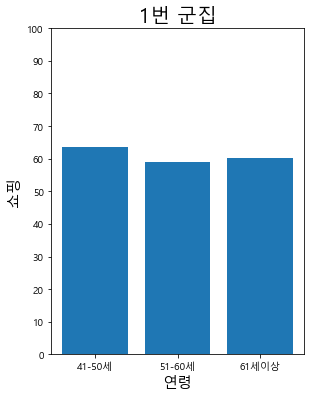

In [10]:

plt.figure(figsize=(10,6))
fig1 = plt.subplot(1,2,1)
plt.bar(df[df['cluster'] == 1]['연령'], df[df['cluster'] == 1]['쇼핑'])
fig1.set_title('1번 군집', fontsize=20)
fig1.set_xlabel('연령', fontsize=15)
fig1.set_ylabel('쇼핑', fontsize=15)
fig1.set_yticks(range(0, 110, 10))

Text(0.5, 1.0, '군집 3')

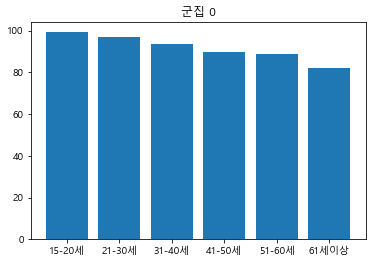

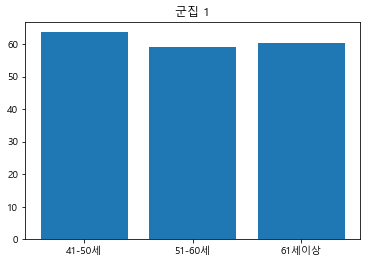

C:\Users\nono\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nono\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


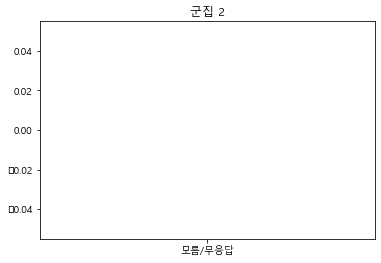

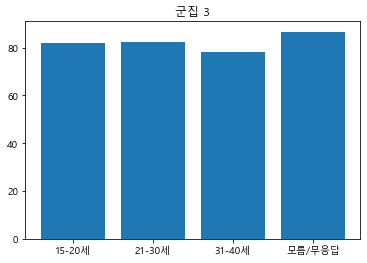

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(df[df['cluster'] == 0]['연령'], df[df['cluster'] == 0]['쇼핑'])
plt.title('군집 0')
plt.figure(figsize=(6, 4))
plt.bar(df[df['cluster'] == 1]['연령'], df[df['cluster'] == 1]['쇼핑'])
plt.title('군집 1')
plt.figure(figsize=(6, 4))
plt.bar(df[df['cluster'] == 2]['연령'], df[df['cluster'] == 2]['쇼핑'])
plt.title('군집 2')
plt.figure(figsize=(6, 4))
plt.bar(df[df['cluster'] == 3]['연령'], df[df['cluster'] == 3]['쇼핑'])
plt.title('군집 3')

In [12]:
# 각 군집이 가진 행 개수
print('군집 0: ', len(df[df['cluster'] == 0]))
print('군집 1: ', len(df[df['cluster'] == 1]))
print('군집 2: ', len(df[df['cluster'] == 2]))
print('군집 3: ', len(df[df['cluster'] == 3]))

군집 0:  12
군집 1:  9
군집 2:  2
군집 3:  12


In [13]:
# 각 군집의 연령
# 왜? 위에서 보니까 군집별로 연령대가 달라서
# 어떻게 알 수 있는가?
# 일단은 산점도를 그려봐서 해볼께

print('군집 0의 연령대:\n', df[df['cluster'] == 0]['연령'].value_counts())
print('\n군집 1의 연령대:\n', df[df['cluster'] == 1]['연령'].value_counts())
print('\n군집 2의 연령대:\n', df[df['cluster'] == 2]['연령'].value_counts())
print('\n군집 3의 연령대:\n', df[df['cluster'] == 3]['연령'].value_counts())

# len(df[df['cluster'] == 0])


군집 0의 연령대:
 21-30세    2
31-40세    2
51-60세    2
15-20세    2
61세이상     2
41-50세    2
Name: 연령, dtype: int64

군집 1의 연령대:
 51-60세    3
41-50세    3
61세이상     3
Name: 연령, dtype: int64

군집 2의 연령대:
 모름/무응답    2
Name: 연령, dtype: int64

군집 3의 연령대:
 모름/무응답    3
21-30세    3
31-40세    3
15-20세    3
Name: 연령, dtype: int64


In [14]:
# 군집별 연령대 시각화
# 뭘로 시각화 해야 잘 했다고 소문이 나지?

In [15]:
# 군집별 목적 비교

def find_mean(column, cluster_n):
    for i in range(cluster_n):
        temp = df[df['cluster'] == i][column].mean()
        print(i, '번 군집의 평균', column, '비율: ', int(temp))
    print('\n')

for columns in col:
    find_mean(columns, 4)

0 번 군집의 평균 쇼핑 비율:  91
1 번 군집의 평균 쇼핑 비율:  58
2 번 군집의 평균 쇼핑 비율:  0
3 번 군집의 평균 쇼핑 비율:  77


0 번 군집의 평균 식도락관광 비율:  73
1 번 군집의 평균 식도락관광 비율:  42
2 번 군집의 평균 식도락관광 비율:  0
3 번 군집의 평균 식도락관광 비율:  55


0 번 군집의 평균 자연경관감상 비율:  56
1 번 군집의 평균 자연경관감상 비율:  29
2 번 군집의 평균 자연경관감상 비율:  0
3 번 군집의 평균 자연경관감상 비율:  28


0 번 군집의 평균 고궁/역사유적지방문 비율:  44
1 번 군집의 평균 고궁/역사유적지방문 비율:  28
2 번 군집의 평균 고궁/역사유적지방문 비율:  0
3 번 군집의 평균 고궁/역사유적지방문 비율:  22


0 번 군집의 평균 업무수행 비율:  16
1 번 군집의 평균 업무수행 비율:  22
2 번 군집의 평균 업무수행 비율:  0
3 번 군집의 평균 업무수행 비율:  9


0 번 군집의 평균 유흥/오락 비율:  17
1 번 군집의 평균 유흥/오락 비율:  5
2 번 군집의 평균 유흥/오락 비율:  0
3 번 군집의 평균 유흥/오락 비율:  14


0 번 군집의 평균 박물관,전시관방문 비율:  21
1 번 군집의 평균 박물관,전시관방문 비율:  9
2 번 군집의 평균 박물관,전시관방문 비율:  0
3 번 군집의 평균 박물관,전시관방문 비율:  8


0 번 군집의 평균 테마파크 비율:  9
1 번 군집의 평균 테마파크 비율:  4
2 번 군집의 평균 테마파크 비율:  0
3 번 군집의 평균 테마파크 비율:  10


0 번 군집의 평균 휴양,휴식 비율:  6
1 번 군집의 평균 휴양,휴식 비율:  10
2 번 군집의 평균 휴양,휴식 비율:  0
3 번 군집의 평균 휴양,휴식 비율:  7


0 번 군집의 평균 미팅,회의,학술대회,박람회참가 비율:  0
1 번 군집의 평균 미팅,회의,학술대회,박람회참가 비율:  11
2 번 군집의 

In [16]:
# 군집별 연령
for i in range(4):
    temp = df[df['cluster'] == i]['연령'].unique()
    print(i, '번 군집의 연령대: ', temp)

# 0번 군집: 골고루 분포
# 1번 군집: 15 ~ 40 비교적 젊은 층 분포
# 2번 군집: 모름 무응답자 분포
# 3번 군집: 41 ~ 61세 이상 장년층 분포

0 번 군집의 연령대:  ['15-20세' '21-30세' '31-40세' '41-50세' '51-60세' '61세이상']
1 번 군집의 연령대:  ['41-50세' '51-60세' '61세이상']
2 번 군집의 연령대:  ['모름/무응답']
3 번 군집의 연령대:  ['15-20세' '21-30세' '31-40세' '모름/무응답']


In [17]:
# 군집별 연도 알고싶은데
for i in range(4):
    temp = df[df['cluster'] == i]['연도'].unique()
    print(i, '번 군집의 연도: ', temp)

0 번 군집의 연도:  [2018 2019]
1 번 군집의 연도:  [2015 2016 2017]
2 번 군집의 연도:  [2018 2019]
3 번 군집의 연도:  [2015 2016 2017]


In [18]:
# 0번 군집 내에서 연도별

def year_compare(cluster_n, year, columns):
    for i in range(cluster_n):
        temp = df[(df['cluster'] == i) & (df['연도'] == year)][columns]
        print(temp)

year_compare(4, 2018, '쇼핑')

21    99.23
22    96.01
23    93.81
24    89.31
25    88.95
26    81.02
Name: 쇼핑, dtype: float64
Series([], Name: 쇼핑, dtype: float64)
27    0.0
Name: 쇼핑, dtype: float64
Series([], Name: 쇼핑, dtype: float64)
